In [2]:
import pandas as pd
import numpy as np
import os   

In [3]:
print('Current directory:', os.getcwd())
print('Files in directory:', os.listdir('.'))

Current directory: e:\Data analysis LLM
Files in directory: ['configure', 'data', 'main.ipynb']


In [4]:
df = pd.read_csv('data/car_prices.csv')

print("Dataset loaded. Basic information:")
print(df.info())

print("\nFirst few rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

Dataset loaded. Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ M

In [5]:
print("Checking for missing values:")
print(df.isnull().sum())

df = df.dropna()
print("\nRows with missing values dropped.")

Checking for missing values:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Rows with missing values dropped.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [7]:
df['year'] = df['year'].astype(int)
df['condition'] = df['condition'].astype(float)
df['odometer'] = df['odometer'].astype(int)

df['saledate'] = pd.to_datetime(df['saledate'])

print("Data types after conversion:")
print(df.dtypes)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2208\1331375087.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'])


Data types after conversion:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer          int64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


C:\Users\Hp\AppData\Local\Temp\ipykernel_2208\1331375087.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['saledate'] = pd.to_datetime(df['saledate'])


In [8]:
text_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']
for col in text_columns:
    df[col] = df[col].str.lower()

print("Sample of normalized text columns:")
print(df[text_columns].head())

Sample of normalized text columns:
    make                model        trim   body transmission state  color  \
0    kia              sorento          lx    suv    automatic    ca  white   
1    kia              sorento          lx    suv    automatic    ca  white   
2    bmw             3 series  328i sulev  sedan    automatic    ca   gray   
3  volvo                  s60          t5  sedan    automatic    ca  white   
4    bmw  6 series gran coupe        650i  sedan    automatic    ca   gray   

  interior  
0    black  
1    beige  
2    black  
3    black  
4    black  


In [9]:
df = df.drop_duplicates()
print("Duplicate rows removed.")
print("New shape of dataset:", df.shape)

Duplicate rows removed.
New shape of dataset: (472325, 16)


In [10]:
print("Updated dataset information:")
print(df.info())

print("\nChecking for any remaining missing values:")
print(df.isnull().sum())

print("\nUnique values in categorical columns:")
for col in text_columns:
    print(f"\nTop 5 unique values in {col}:")
    print(df[col].value_counts().head())

Updated dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  int64  
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 61.3+ MB
None

Che

In [11]:
print("Top 10 car makes:")
print(df['make'].value_counts().head(10))

print("\nAverage selling price by make (top 10):")
print(df.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(10))

numeric_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
correlation_matrix = df[numeric_cols].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

Top 10 car makes:
make
ford         81013
chevrolet    54150
nissan       44043
toyota       35313
dodge        27181
honda        24781
hyundai      18659
bmw          17509
kia          15828
chrysler     15133
Name: count, dtype: int64

Average selling price by make (top 10):
make
rolls-royce     153456.250000
ferrari         128852.941176
lamborghini     111500.000000
bentley          72713.333333
tesla            67054.347826
aston martin     55500.000000
fisker           46461.111111
maserati         43729.816514
lotus            40800.000000
porsche          38932.109767
Name: sellingprice, dtype: float64

Correlation matrix:
                  year  condition  odometer       mmr  sellingprice
year          1.000000   0.334760 -0.773102  0.588614      0.578933
condition     0.334760   1.000000 -0.314205  0.276521      0.317712
odometer     -0.773102  -0.314205  1.000000 -0.582654     -0.577397
mmr           0.588614   0.276521 -0.582654  1.000000      0.983493
sellingprice  0.578

In [18]:
df.to_csv('data/preprocessed_car_prices.csv', index=False)
print("Preprocessed data saved to 'data/preprocessed_car_prices.csv'")

Preprocessed data saved to 'data/preprocessed_car_prices.csv'


In [19]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [21]:
def generate_insight(prompt, max_new_tokens=100):
    inputs = tokenizer.encode(prompt, return_tensors="pt", truncation=True, max_length=512)
    outputs = model.generate(
        inputs, 
        max_new_tokens=max_new_tokens, 
        num_return_sequences=1, 
        temperature=0.7,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [22]:
def analyze_price_trends(df):
    avg_price = df['sellingprice'].mean()
    max_price = df['sellingprice'].max()
    min_price = df['sellingprice'].min()
    prompt = f"The average selling price of cars is ${avg_price:.2f}, with a maximum of ${max_price:.2f} and a minimum of ${min_price:.2f}. Provide an analysis of these price trends."
    return generate_insight(prompt)

def analyze_popular_makes(df):
    top_makes = df['make'].value_counts().head(5).to_dict()
    prompt = f"The top 5 car makes in the dataset are {top_makes}. What insights can we draw from this information about market preferences?"
    return generate_insight(prompt)

def analyze_condition_impact(df):
    avg_price_by_condition = df.groupby('condition')['sellingprice'].mean().to_dict()
    prompt = f"The average selling prices by condition rating are {avg_price_by_condition}. How does the condition of a car impact its selling price?"
    return generate_insight(prompt)

In [23]:
print("Price Trends Analysis:")
print(analyze_price_trends(df))

print("\nPopular Makes Analysis:")
print(analyze_popular_makes(df))

print("\nCondition Impact Analysis:")
print(analyze_condition_impact(df))

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Price Trends Analysis:
The average selling price of cars is $13611.36, with a maximum of $230000.00 and a minimum of $1.00. Provide an analysis of these price trends.

A car's value is determined by:

A car's price, and

The price of the car. A car's value is determined by: A car's price, and

The price of the car.

How much do cars cost?

How much do cars cost?

What is a car worth?

How much are cars worth?

How much are cars worth?

What is the cost of buying a car?


Popular Makes Analysis:
The top 5 car makes in the dataset are {'Ford': 93554, 'Chevrolet': 60197, 'Nissan': 53946, 'Toyota': 39871, 'Dodge': 30710}. What insights can we draw from this information about market preferences?

Car Trend Predictions

There are many factors that can affect the car's performance. First, the market is very competitive and will likely react in different ways. Second, it is difficult to predict what kind of car is likely to win or what kind of car will lose. Finally, cars with low margins or p

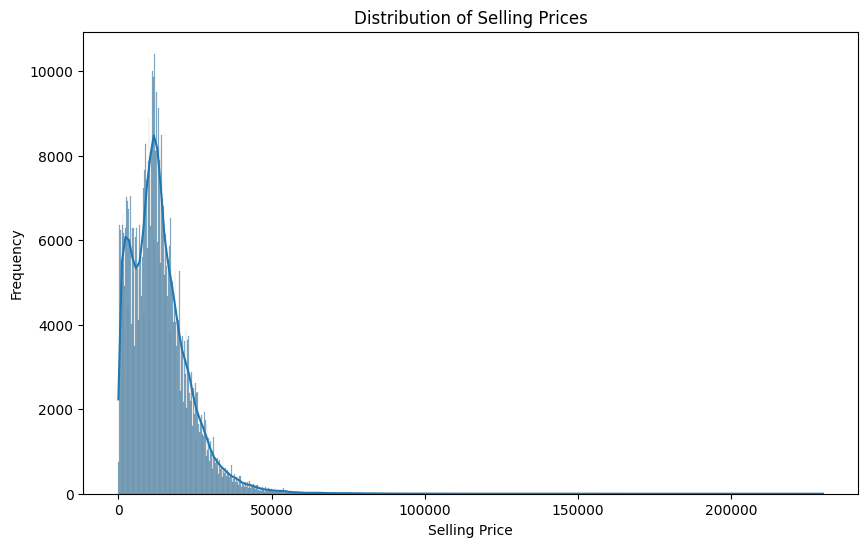

Based on this description of a price distribution: The histogram shows a right-skewed distribution of selling prices, with a peak around [insert peak value] and a long tail extending to higher prices.
What insights can we draw about the car market from this price distribution?
We can infer that the market will be stronger with a higher price distribution than with a lower price distribution. Indeed, we get this from the graph of the price distribution of all the cars over the first two curves:
Fig. 4. The market for all the cars over the first two curves, showing the average price distribution on the first curve and the average price distribution on the second curve.
The first curve shows the average price distribution of cars that have sold in the first two curves over


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

plot_description = "The histogram shows a right-skewed distribution of selling prices, with a peak around [insert peak value] and a long tail extending to higher prices."
prompt = f"Based on this description of a price distribution: {plot_description}\nWhat insights can we draw about the car market from this price distribution?"
print(generate_insight(prompt))

In [25]:
import pandas as pd
import re

def extract_make_model(user_input):
    pattern = r'(?:i want to buy a|i want|buy|what about)\s*(\w+)\s+(\w+)'
    match = re.search(pattern, user_input.lower())
    if match:
        return match.group(1), match.group(2)
    return None, None

def search_cars(df, make, model):
    return df[(df['make'].str.lower() == make.lower()) & (df['model'].str.lower() == model.lower())]

def generate_car_summary(cars):
    if cars.empty:
        return "No results found for this make and model."
    
    year_avg = int(cars['year'].mean())
    condition_avg = cars['condition'].mean()
    odometer_avg = int(cars['odometer'].mean())
    price_avg = cars['sellingprice'].mean()
    
    top_choices = cars.sort_values(
        by=['year', 'condition', 'sellingprice'], 
        ascending=[False, False, True]
    ).head(5)
    
    result = f"Average Year: {year_avg}\n"
    result += f"Average Condition: {condition_avg:.1f}/5\n"
    result += f"Average Odometer: {odometer_avg:,} miles\n"
    result += f"Average Price: ${price_avg:,.2f}\n\n"
    result += "Top 5 Suggestions:\n"
    for i, row in top_choices.iterrows():
        result += f"- {row['year']} {row['make'].capitalize()} {row['model'].capitalize()}: "
        result += f"Condition {row['condition']:.1f}/5, "
        result += f"Odometer {row['odometer']:,} miles, "
        result += f"Price ${row['sellingprice']:,.2f}\n"
    return result

def car_assistant(df):
    while True:
        user_input = input("How can I assist you with cars today? (Type 'exit' to quit)\n")
        
        if user_input.lower() == 'exit':
            print("Thank you for using the car assistant. Goodbye!")
            break
        
        make, model = extract_make_model(user_input)
        
        if make and model:
            cars = search_cars(df, make, model)
            summary = generate_car_summary(cars)
            print(f"\nHere's what I found for {make.capitalize()} {model.capitalize()}:")
            print(summary)
        else:
            print("I'm sorry, I couldn't understand your query. Please use one of these formats:")
            print("- I want to buy a [make] [model]")
            print("- I want [make] [model]")
            print("- buy [make] [model]")
            print("- what about [make] [model]")

df = pd.read_csv('data/car_prices.csv')

car_assistant(df)


Here's what I found for Audi A4:
Average Year: 2008
Average Condition: 29.4/5
Average Odometer: 75,397 miles
Average Price: $12,476.40

Top 5 Suggestions:
- 2015 Audi A4: Condition 49.0/5, Odometer 10,559.0 miles, Price $27,400.00
- 2015 Audi A4: Condition 49.0/5, Odometer 2,365.0 miles, Price $28,000.00
- 2015 Audi A4: Condition 49.0/5, Odometer 7,136.0 miles, Price $30,250.00
- 2015 Audi A4: Condition 48.0/5, Odometer 4,164.0 miles, Price $30,400.00
- 2015 Audi A4: Condition 46.0/5, Odometer 3,827.0 miles, Price $29,500.00


Here's what I found for Bmw M5:
Average Year: 2009
Average Condition: 36.4/5
Average Odometer: 53,692 miles
Average Price: $41,897.25

Top 5 Suggestions:
- 2014 Bmw M5: Condition 49.0/5, Odometer 1,911.0 miles, Price $85,000.00
- 2014 Bmw M5: Condition 49.0/5, Odometer 3,129.0 miles, Price $99,000.00
- 2014 Bmw M5: Condition 48.0/5, Odometer 4,503.0 miles, Price $96,500.00
- 2014 Bmw M5: Condition 48.0/5, Odometer 2,077.0 miles, Price $102,000.00
- 2014 Bmw M5: 